# ARIMA TIME SERIES - PRICE PREDICTION

In [1]:
# Import libraries and dependencies
%matplotlib inline
import yfinance as yf
import quantstats as qs
import numpy as np
import pandas as pd
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

## Data collection and cleaning

In [2]:
# Names of intersted stocks
tickers = ['AMZN', 'PFE', 'BAC', 'COKE', 'SQ', 'AAPL', 'AMD', 'FDX',
           'EBAY', 'AMZN', 'C','F', 'GDX', 'USO']

tickers = yf.download(tickers = tickers,
                      start = "2020-01-01", 
                      period="max", 
                      interval = "1d")

tickers.tail()

[*********************100%***********************]  13 of 13 completed


Adj Close                                                 \
                  AAPL         AMD         AMZN        BAC          C   
Date                                                                    
2021-08-23  149.710007  108.769997  3265.870117  40.910000  70.889999   
2021-08-24  149.619995  107.650002  3305.780029  41.480000  72.040001   
2021-08-25  148.360001  108.300003  3299.179932  42.150002  73.180000   
2021-08-26  147.539993  107.269997  3316.000000  42.040001  72.440002   
2021-08-27  148.600006  111.400002  3349.629883  42.490002  72.989998   

                                                                 ...  \
                  COKE       EBAY      F         FDX        GDX  ...   
Date                                                             ...   
2021-08-23  400.000000  73.199997  12.73  266.899994  32.119999  ...   
2021-08-24  397.579987  72.839996  13.08  267.809998  32.110001  ...   
2021-08-25  396.010010  74.160004  13.17  270.369995  31.680000  ...   
2021-08-26  391.100006  75.639999  12.90  267.459991  31.480000  ...   
2021-08-27  399.950012  76.410004  13.31  267.899994  32.610001  ...   

              Volume                                                         \
                 BAC         C   COKE     EBAY         F      FDX       GDX   
Date                                                                          
2021-08-23  35364500  13079500  13500  5044700  64573600  2041400  34967700   
2021-08-24  35579300  12669300  15600  6132300  53672500  2111700  12994500   
2021-08-25  51219900  17766600  13700  5052500  51195500  2116200  20259400   
2021-08-26  41184500  14135600  14400  5539700  57559800  1312100  18155600   
2021-08-27  46455500  13666900  20400  5093200  57524000  1551700  43771600   

                                        
                 PFE       SQ      USO  
Date                                    
2021-08-23  88652400  6071300  4578600  
2021-08-24  52624100  4258100  4881900  
2021-08-25  51036800  3428700  4801300  
2021-08-26  29029300  4314400  4904400  
2021-08-27  32874400  4640300  4106900  

[5 rows x 78 columns]

In [3]:
# Drop duplicates
tickers.drop_duplicates(inplace=False)

# Drop NA and infinite values
tickers = tickers.replace(-np.inf, np.nan).dropna()

tickers.head()

Adj Close                                                \
                 AAPL        AMD         AMZN        BAC          C   
Date                                                                  
2019-12-31  72.443558  45.860001  1847.839966  33.987522  75.055855   
2020-01-02  74.096443  49.099998  1898.010010  34.392818  76.314774   
2020-01-03  73.376083  48.599998  1874.969971  33.678719  74.877335   
2020-01-06  73.960770  48.389999  1902.880005  33.630463  74.642464   
2020-01-07  73.612930  48.250000  1906.859985  33.408516  73.994225   

                                                                    ...  \
                  COKE       EBAY         F         FDX        GDX  ...   
Date                                                                ...   
2019-12-31  282.210938  35.378418  9.144482  148.220566  29.127918  ...   
2020-01-02  280.571594  35.564568  9.262475  152.033676  29.197554  ...   
2020-01-03  283.909851  35.231457  9.055987  150.151611  29.018490  ...   
2020-01-06  280.184113  35.055103  9.006823  150.269226  29.068228  ...   
2020-01-07  277.352631  34.898346  9.095318  151.739578  29.346775  ...   

              Volume                                                         \
                 BAC         C   COKE     EBAY         F      FDX       GDX   
Date                                                                          
2019-12-31  29630100   8031200  41900  7437700  32342100  2153400  32773500   
2020-01-02  37614200  12728900  42300  4979300  43425700  3027600  40709100   
2020-01-03  50357900  12437400  37500  3960900  45040800  2216500  47399500   
2020-01-06  42185000  10059500  29300  5866000  43372300  2389700  45483100   
2020-01-07  34149000  10469100  42400  6867400  44984100  2140100  39181100   

                                         
                 PFE        SQ      USO  
Date                                     
2019-12-31  15175703   5339600  1450663  
2020-01-02  16514072   5264700  1563638  
2020-01-03  14922848   5087100  4325450  
2020-01-06  15771951   5905200  2598413  
2020-01-07  20108107  10368200  1742075  

[5 rows x 78 columns]

In [4]:
# Count nulls/checking final df
tickers.isnull().sum()

Adj Close  AAPL    0
           AMD     0
           AMZN    0
           BAC     0
           C       0
                  ..
Volume     FDX     0
           GDX     0
           PFE     0
           SQ      0
           USO     0
Length: 78, dtype: int64

## Autocorrelation and Partial Autocorrelation Analysis

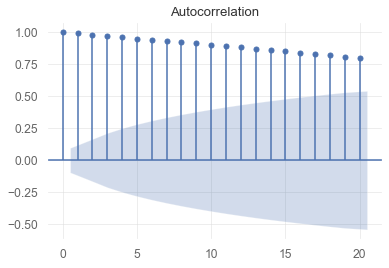

In [5]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(tickers.Close.AMZN, lags=20);

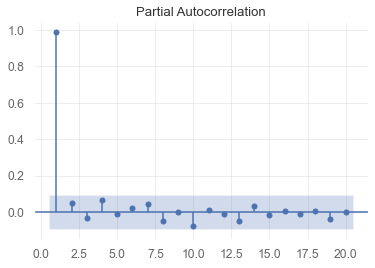

In [6]:
# Plot PACF
plot_pacf(tickers.Close.AMZN, zero=False, lags=20);

In [7]:
from statsmodels.tsa.stattools import adfuller

adfuller(tickers.Close.AMZN)

(-1.8892778208610386,
 0.33712185204333345,
 0,
 418,
 {'1%': -3.4460914174990296,
  '5%': -2.868479374038333,
  '10%': -2.570466459559076},
 4407.974026351989)

In [8]:
# Run ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# Create the ARIMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags

model = ARIMA(tickers['Close']['AMZN'].values, 
              order=(3,1,0))

In [9]:
# Fit the model to the data
result_ARIMA = model.fit()

# Display model summary
result_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  418
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -2293.098
Method:                       css-mle   S.D. of innovations             58.376
Date:                Mon, 30 Aug 2021   AIC                           4596.196
Time:                        19:59:45   BIC                           4616.374
Sample:                             1   HQIC                          4604.173
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5729      2.558      1.397      0.162      -1.441       8.586
ar.L1.D.y     -0.0411      0.049     -0.843      0.399      -0.136       0.054
ar.L2.D.y      0.0194      0.049      0.399      0.690      -0.076       0.115
ar.L3.D.y     -0.0953      0.049     -1.962      0.050      -0.191   -8.92e-05
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0598           -0.0000j            2.0598           -0.5000
AR.2            1.1319           -1.9525j            2.2569           -0.1664
AR.3            1.1319           +1.9525j            2.2569            0.1664
-----------------------------------------------------------------------------
"""

In [10]:
result_ARIMA.aic

4596.196470399312

In [11]:
result_ARIMA.bic

4616.373877561936

,0
0,3353.195867
1,3356.090657
2,3356.826388
3,3360.503219
4,3364.081304


<AxesSubplot:title={'center':'5 Days Forecast'}>

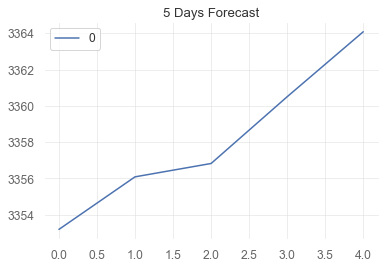

In [12]:
predicted_df = pd.DataFrame(result_ARIMA.forecast(steps=5)[0])

display(predicted_df.head())

predicted_df.plot(title="5 Days Forecast")

In [19]:
actual_close = tickers['Close']['AMZN']

actual_close.head()

Date
2019-12-31    1847.839966
2020-01-02    1898.010010
2020-01-03    1874.969971
2020-01-06    1902.880005
2020-01-07    1906.859985
Name: AMZN, dtype: float64

In [20]:
prev_predit_df = pd.concat([actual_close, predicted_df],
                           axis=0)

display(prev_predit_df.head())

display(prev_predit_df.tail())

,0
2019-12-31 00:00:00,1847.839966
2020-01-02 00:00:00,1898.010010
2020-01-03 00:00:00,1874.969971
2020-01-06 00:00:00,1902.880005
2020-01-07 00:00:00,1906.859985


,0
0,3353.195867
1,3356.090657
2,3356.826388
3,3360.503219
4,3364.081304


In [21]:
prev_predit_df.rename(columns={0: "Close"})

,Close
2019-12-31 00:00:00,1847.839966
2020-01-02 00:00:00,1898.010010
2020-01-03 00:00:00,1874.969971
2020-01-06 00:00:00,1902.880005
2020-01-07 00:00:00,1906.859985
...,...
0,3353.195867
1,3356.090657
2,3356.826388
3,3360.503219


In [22]:
actual_close.shape

(419,)

In [23]:
prev_predit_df.shape

(424, 1)

In [24]:
prev_predit_df.to_csv("Pred_TimeSeries.csv")